In [48]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [49]:
# df = pd.read_csv("C:/Users/Balaji/Desktop/SEM 6/ML&C Lab/Datasets/Wine.csv")

In [51]:
df = load_wine() 

In [52]:
df = pd.DataFrame(data=df['data'],columns=df['feature_names'])

In [40]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [41]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [42]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [43]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [44]:
df=df.dropna(how='any')

In [45]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [19]:
x=df.iloc[:,0:8]
y=df['']

KeyError: ''

In [248]:
x

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2
0,1,22.0,7.2500,0,1,0,0,0
1,2,38.0,71.2833,1,1,0,0,0
2,3,26.0,7.9250,1,0,0,0,0
3,4,35.0,53.1000,1,1,0,0,0
4,5,35.0,8.0500,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0


In [249]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: 2urvived, Length: 1307, dtype: int64

In [250]:
sc=StandardScaler()
x_std=sc.fit_transform(x)

In [251]:
x_std

array([[-1.73202385, -0.58026066, -0.50183865, ...,  0.        ,
         0.        ,  0.        ],
       [-1.72937679,  0.66229729,  0.7360229 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.72672973, -0.26962117, -0.48878987, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.72503659,  0.70112723, -0.50183865, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.72768365, -0.11430143, -0.48637343, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73033071, -0.11430143, -0.20977212, ...,  0.        ,
         0.        ,  0.        ]])

In [252]:
x_std.shape

(1307, 8)

In [253]:
x_train,y_train,x_test,y_test=train_test_split(x_std,y,test_size=0.3,random_state=50)

In [254]:
y.shape

(1307,)

In [255]:
km = KMeans(n_clusters=3, max_iter=400, verbose=True, tol=0.2)

In [256]:
pred = km.fit_predict(df[['Sex','Fare']])

Initialization complete
Iteration 0, inertia 820257.0466001091
Converged at iteration 0: center shift 262.0398532214424 within tolerance 267.6115058067257.
Initialization complete
Iteration 0, inertia 926705.2897388196
Converged at iteration 0: center shift 121.19180327842209 within tolerance 267.6115058067257.
Initialization complete
Iteration 0, inertia 631506.5397989382
Iteration 1, inertia 585906.2178113323
Converged at iteration 1: center shift 96.7028365536915 within tolerance 267.6115058067257.
Initialization complete
Iteration 0, inertia 1137302.8816923115
Iteration 1, inertia 729518.1605051477
Iteration 2, inertia 671221.0773910205
Iteration 3, inertia 623118.2623374035
Iteration 4, inertia 587865.8827704219
Converged at iteration 4: center shift 105.80874015903984 within tolerance 267.6115058067257.
Initialization complete
Iteration 0, inertia 818934.5722551118
Iteration 1, inertia 661110.910106951
Converged at iteration 1: center shift 174.27500440499364 within tolerance 267

In [260]:
pred

array([0, 2, 0, ..., 0, 0, 0])

In [261]:
acc_score = accuracy_score(df['2urvived'],pred)*100

In [262]:
acc_score

64.80489671002296

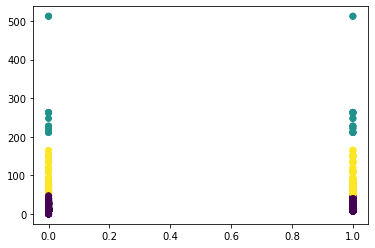

In [271]:
plt.scatter(df['Sex'], df['Fare'], c=pred)